# Análise de dados de vagas de emprego

Agora, nesta etapa do projeto será realizado, após o `scrapping` em um dos maiores portais de vagas do Brasil, o indeed, vamos analisar os dados, extraindo insights e teremos uma aplicação de `Processamento de Linguagem Natural`.

## Importando os pacotes

Os pacotes a serem utilizados serão:
- `numpy` e `pandas` para manipulação de dados
- `matplotlib` e `seaborn` para visualização de dados
- `NLTK` para *Processamento de Linguagem Natural*

In [1]:
# Importando os pacotes
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
# nltk.download()

%matplotlib inline

## Web Scraping

O código para `scraping` está em outro arquivo neste mesmo repositório. Neste `notebook` vamos fazer a **Análise exploratória** com os dados coletados.

## Dicionário dos dados

`Título` é a nome da vaga oferecida.

`Localidade` é o local de onde a vaga está sendo oferecida.

`Empresa` é o nome da Empresa.

`Classificação` é a nota de avaliação da Empresa.

`Salário` é o salário base oferecido na vaga.

`Dias_publicado` é a quantidade de dias passados desde a publicação.

`Tipo_Pesquisa` se orgânica ou paga.

`Desc` é a descrição da vaga.

`Termo_pesq` são os termos pesquisados que resultaram nas respectivas vagas.

## Análise de dados

Análise de dados é um processo de *inspeção*, *limpeza*, *transformação* e *modelagem* dos dados com o objetivo de gerar `insights` para conclusões e tomadas de decisão.<br>
Estima-se que de **70% à 80%** do tempo em um projeto de `Machine Learning` são gastos nessa etapa.

Vamos iniciar carregando nosso *dataset* que salvamos em disco.

In [2]:
# carregando o dataset
df = pd.read_csv('resultado/dados.csv', encoding='utf-8', index_col=0)

Vamos dar uma olhada nas primeiras 3 linhas para ter uma primeira visão da *conjunto de dados*.

In [3]:
# visualizando as primeiras linhas
df.head(3)

,Titulo,Localidade,Empresa,Classificacao,Salario,Dias_publicado,Tipo_Pesquisa,Desc,Termo_pesq
0,Cardiology/Oncology Clinical Research Associate,"Zona Sul de São Paulo, SP",Atlantis Clinical Brazil,None,None,há 2 dias,Organic,Atlantis Clinical is an American niche Clinica...,data+science
1,Data Analyst Equity - São Paulo,"São Paulo, SP",Bloomberg,"3,9",None,Há mais de 30 dias,Organic,"Bloomberg runs on data. In Global Data, we're ...",data+science
2,Data Engineer Junior,"São José dos Campos, SP",Quero Educação,"3,5",None,Recém publicada,Organic,O time de Data Engineering é responsável por g...,data+science


Importante saber a dimensão, quantidade de linhas e colunas do dataframe.

In [4]:
# Visualizando as dimensões
df.shape

(3150, 9)

Huuumm!! Tem muitas linhas, porém, na construção do *scraper* observamos que algumas vagas duplicam durante as buscas, então vamos remover essas linhas duplicadas com o método `drop.duplicates()`.

In [5]:
# removendo as linhas duplicadas
df = df.drop_duplicates()

# resetando o index para ficar na sequencia
df.reset_index(drop=True, inplace=True)

# visualizando o shape do resultado
df.shape

(595, 9)

Reduziu consideravelmente, mas vamos analisar assim mesmo.

Então vamos `definir algumas perguntas` para responder e seguir para **analisar nossos dados**.


**Obs.:** O `scraping` foi realizado com **seis termos** para buscas (*data science*, *business intelligence*, *machine learning*, *analista bi*, *cientista dados*, *analista dados*), com as primeiras 20 páginas de cada termo e cada página com 15 anúncios cada, no dia **23/07/2020**.

### 1. Quantas vagas foram retornadas por termos da pesquisa?

Foram pesquisados seis termos, então podemos usar o método `value_counts()` para saber.

In [6]:
# verificando a quantidade por termo
df.Termo_pesq.value_counts()

analista+dados           110
machine+learning         109
data+science             103
analista+bi               98
business+intelligence     94
cientista+dados           81
Name: Termo_pesq, dtype: int64

Nesta amostra, resultaram mais vagas para as buscas de **Analista de dados**.

### 2. Qual o tipo de vaga mostrado na pesquisa, orgânica ou patrocinada?

Vamos definir os tipos `orgânica` e `patrocinada` antes de prosseguir, de forma bem resumida:
- **Publicação Organica:** São todas as pessoas que visualizam e interagem com as publicações de forma gratuita.
- **Publicação patrocinada:** É quando há um investimento para um anúncio ou publicação específica para mais pessoas.

In [7]:
# contando o total de registros por valor da coluna "Tipo_Pesquisa"
df['Tipo_Pesquisa'].value_counts()

Organic    595
Name: Tipo_Pesquisa, dtype: int64

Podemos ver que neste *scraping* só retornaram vagas do tipo `orgânica`.

### 3. Quantas empresas anunciaram e qual tem o maior número de vagas pesquisadas?

Para sabermos a quantidade de empresas, devemos tirar os **valores duplicados** da coluna **Empresa** e vamos fazer isso com o método `unique()` dentro da função `len`.

In [8]:
# criando um objeto contando as empresas unicas no dataframe
qtde_empresas = len(df['Empresa'].unique())

# exibindo a quantidade
print(f'Quantidade de empresas anunciantes: {qtde_empresas}')

Quantidade de empresas anunciantes: 325


Para saber qual ou quais empresas com os maiores números de vagas, vamos agrupar a coluna **Empresa**, utilizando o método `groupby`.

In [9]:
# criando o objeto para agrupamento
grupo_emp = df.groupby(['Empresa']).count()['Titulo'].sort_values(ascending=False)

# visualizando o agrupamento das 20 primeiras
grupo_emp.head(20)

Empresa
Inovation IT Premium Outsourcing    15
PicPay                              11
Keyrus                              11
Grupo Globo                          9
Vivo (Telefônica Brasil)             9
Ambev                                8
ViaVarejo                            7
IQVIA                                7
SiDi                                 7
INSTITUTO ATLANTICO                  7
Carreiras Afya Educacional           7
Samsung Electronics                  6
BR Distribuidora                     6
None                                 5
Eldorado                             5
YDUQS                                5
Loadsmart                            5
Pmweb                                5
marketdata                           5
Quero Educação                       4
Name: Titulo, dtype: int64

Vimos que nesta análise contém **325 empresas** e a empresa com maior número de vagas tem **15 vagas** anunciadas. Só por curiosidade, quais são essas 15 vagas?

In [10]:
df[df.Empresa == 'Inovation IT Premium Outsourcing'].Titulo.to_list()

['Consultor Power BI Sênior',
 'Analista Power BI Pleno',
 'Analista BI Pleno - Power Center',
 'Analista BI - ETL/PowerBI',
 'Data Scientist',
 'Cientista de Dados ( Junior , Pleno e Sênior )',
 'Analista Power BI Pleno',
 'Analista BI Pleno - Power Center',
 'Cientista de Dados',
 'Cientista de Dados ( Estatístico )',
 'CIENTISTA DE DADOS SENIOR',
 'Engenheiro de Dados',
 'Cientista de Dados Sênior - Jundiai',
 'Cientista de Dados ( Junior , Pleno e Sênior )',
 'Analista de Governança de dados']

Estão oferecendo mais vagas para **Cientistas de dados** e **Analistas de dados**.

Podemos plotar os dados relacionados às Empresas com as respectivas quantidades de vagas com um `barplot`.

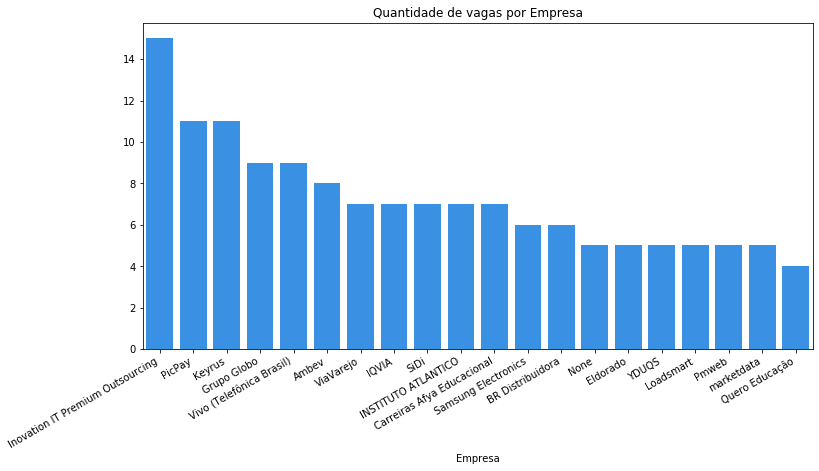

In [11]:
# definindo o tamanho
plt.figure(figsize=(12, 6))

# criando a visualização
sns.barplot(x = grupo_emp.head(20).index, y=grupo_emp.head(20).values, color='dodgerblue')

# inserindo o título
plt.title('Quantidade de vagas por Empresa')

# ajustando o eixo x
plt.xticks(rotation=30, horizontalalignment='right');

### 4. Qual é a média salarial anunciadas nas vagas?

Vamos usar um `value_counts()` para ver como os valores estão dispostos.<br>
Podemos notar que poucas empresas colocaram o *salario* ou *faixa salarial* nos anúncios.

In [12]:
# verificar o ranking da coluna "Salario"
df.Salario.value_counts()

None                           573
R$ 4.350 por mês                 2
R$ 4.500 - R$ 6.000 por mês      2
R$ 159.604 por ano               1
R$ 2.875 por mês                 1
R$ 2.300 por mês                 1
R$ 1.500 - R$ 2.500 por mês      1
R$ 2.000 - R$ 3.000 por mês      1
R$ 6.000 por mês                 1
R$ 8.000 por mês                 1
R$ 1.000 por mês                 1
R$ 2.700 por mês                 1
R$ 2.500 - R$ 3.000 por mês      1
R$ 3.500 - R$ 4.000 por mês      1
R$ 10.674 por ano                1
R$ 3.000 - R$ 4.000 por mês      1
R$ 4.000 - R$ 4.500 por mês      1
R$ 7.860 por ano                 1
R$ 4.500 por mês                 1
R$ 7.000 - R$ 9.000 por mês      1
R$ 3.000 por mês                 1
Name: Salario, dtype: int64

Para sabermos a média, precisamos fazer uma transformação na coluna *Salario*. Então, vamos fazer o seguinte:<br>
Criaremos uma função para esta transformação, com os seguintes passos:
- Faremos uma cópia do dataframe original, caso algo dê errado, podemos retomar daqui, utilizando o método `copy()`;
- Remover os caracteres, mantendo somente os números e quando for uma faixa, manteremos o "-", utilizando o método `replace()`;
- Como vimos que poucos anúncios contém salário, vamos filtrar somente essas linhas;
- Vamos utilizar o método `split()` e criaremos duas colunas, separando por "-", uma coluna para para especificar o mínimo salário da faixa e outro para especificar o máximo salário da faixa;
- A coluna "Salario", original do dataframe, vamos renomear para "Faixa_Salarial";
- Vamos criar uma coluna única, nomeada como "Salario", com a seguinte condição, onde a coluna "Salario_max" for igual a 0 (quer dizer que não é uma faixa e sim o salário da vaga, que está em outra coluna, "Salario_min") usa esse valor, caso for diferente de 0, faz a média das colunas "Salario_min" e Salario_max";
- Por fim, removeremos as colunas "Salario_max" e "Salario_min" e retorna o dataframe.

In [13]:
def salary_transf():
    
    # criando uma cópia do dataframe
    df1 = df.copy()
    
    # removendo as pontuações e palavras que não agregarão
    df1['Salario'] = df.Salario.str.replace('[None|.|R$| por mês ano]','', regex=True)
    
    # filtrando somente as vagas que publicou o salario ou faixa salarial
    df1 = df1[df1['Salario'] != '']
    
    # separando os valores com faixa salarial em duas colunas
    df1['Salario_min'] = df1.loc[:, 'Salario'].str.split('-', expand=True)[0].astype(int)
    df1['Salario_max'] = df1.loc[:, 'Salario'].str.split('-', expand=True)[1].fillna(0).astype(int)
    
    # renomeando a coluna salario para faixa salarial
    df1 = df1.rename(columns={'Salario': 'Faixa_Salarial'})
    
    # criando uma nova coluna para salario com a condição, com valor unico
    df1['Salario'] = np.where(df1['Salario_max'] != 0, df1[['Salario_min', 'Salario_max']].mean(axis=1), df1['Salario_min'])
    
    # removendo as duas colunas que usamos para separar a faixa salarial
    df1.drop(['Salario_min', 'Salario_max'], axis=1, inplace=True)
    
    return df1
    
# executando a função
df1 = salary_transf()

Agora poderemos responder nossa questão. Vamos fazer um agrupamento por "Título", utilizado o método `groupby()` para obtermos média.

In [14]:
# Analisando as médias de Salários por Título e ordenando do maior para o menor
df1.groupby(['Titulo'])['Salario'].mean().sort_values(ascending=False)

Titulo
Technical Systems Analyst                                       159604.000000
Northern Powerhouse Business Specialist - DIT Rio de Janeiro     10674.000000
Senior Business Analyst                                           8000.000000
Cientista de Dados                                                8000.000000
Northeast Business Development Manager                            7860.000000
Engenheiro(a) de Dados / Desenvolvedor(a) Web Analytics           6000.000000
Data Scientist Pleno                                              5250.000000
Analista de Sistemas - Centro                                     4500.000000
Analista de Dados Pleno                                           4350.000000
Analista de Dados Junior                                          3500.000000
Analista de Business Intelligence                                 3333.333333
Programador Web (Full Stack)                                      3000.000000
Analista de Logística Jr                                 

**Opa! Tem um valor muito discrepante dos demais**.<br>
Se observarmos antes de aplicar a transformação, temos 3 valores que estão "por ano" porém somente um parece fazer mais sentido, então estamos supondo que os outros foram erros de digitação e vamos considerar como "por mês".

Para esse valor discrepante vamos dividir por 12 para termos o valor mensal oferecido para vaga.<br>
Vamos deixar a `função mais genérica` e colocar uma condição para qualquer valor acima de 100.000 para fazer a divisão.

In [15]:
# convertendo o salario anual em mensal
df1.loc[df1.Salario > 100000, 'Salario'] = df1[df1.Salario > 100000]['Salario'] / 12

Vamos dar uma conferida para ver o resultado?!

In [16]:
# Analisando as médias de Salários por Título e ordenando do maior para o menor
df1.groupby(['Titulo'])['Salario'].mean().sort_values(ascending=False)

Titulo
Technical Systems Analyst                                       13300.333333
Northern Powerhouse Business Specialist - DIT Rio de Janeiro    10674.000000
Senior Business Analyst                                          8000.000000
Cientista de Dados                                               8000.000000
Northeast Business Development Manager                           7860.000000
Engenheiro(a) de Dados / Desenvolvedor(a) Web Analytics          6000.000000
Data Scientist Pleno                                             5250.000000
Analista de Sistemas - Centro                                    4500.000000
Analista de Dados Pleno                                          4350.000000
Analista de Dados Junior                                         3500.000000
Analista de Business Intelligence                                3333.333333
Programador Web (Full Stack)                                     3000.000000
Analista de Logística Jr                                         2875

Mesmo assim a vaga continuou sendo o salário mais alto oferecido, mas agora está mais justo.

Vamos dar uma olhada na distribuição com um `histograma`.

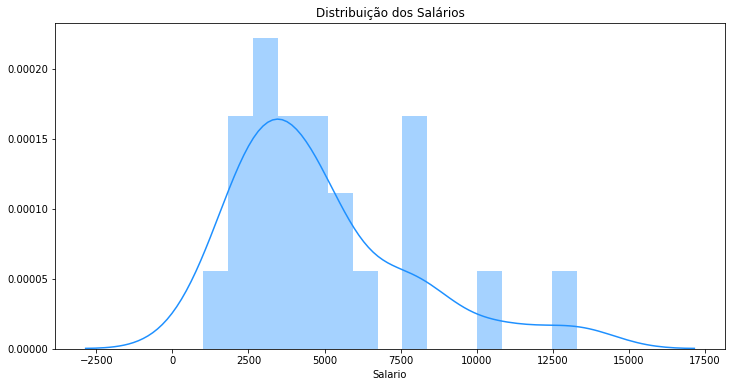

In [17]:
# definindo o tamanho
plt.figure(figsize=(12, 6))

# criando a visualização
sns.distplot(df1.Salario, bins=15, color='dodgerblue')

# inserindo o título
plt.title('Distribuição dos Salários');

Graficamente podemos observar que tem alguns `outliers` e que está um pouco deslocada e podemos comprovar isso com o método `skew`, que estatisticamente mostra o valor de `assimetria` da curva.

In [18]:
df1.Salario.skew()

1.3489559048831272

Para se aproximar de uma `normal` o valor tem de resultar em torno de `0`.

### 5. Qual localidade tem o maior número de vagas listadas?

Vamos verificar fazendo um agrupamento por **localidade**, com o método `groupby()`.

In [19]:
# criando o objeto para agrupamento
grupo_local = df.groupby(['Localidade']).count()['Titulo'].sort_values(ascending=False)

# visualizando o agrupamento
grupo_local

Localidade
São Paulo, SP         206
Rio de Janeiro, RJ     64
Brasil                 37
Porto Alegre, RS       29
Campinas, SP           26
                     ... 
Itapevi, SP             1
Itajaí, SC              1
Guaíba, RS              1
Exterior                1
Alphaville, SP          1
Name: Titulo, Length: 85, dtype: int64

A cidade de **São Paulo** tem o maior número de vagas em *Data Science*.

Da mesma forma que fizemos anteriormente, vamos plotar esse grupo também, mas somente os **20 primeiros**.

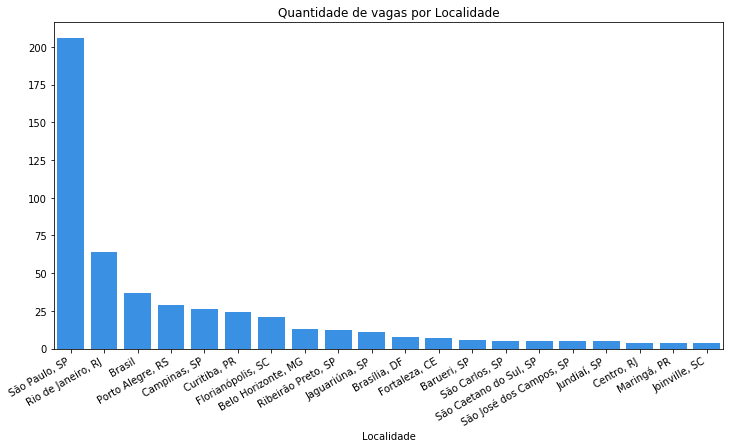

In [20]:
# definindo o tamanho
plt.figure(figsize=(12, 6))

# criando a visualização
sns.barplot(x = grupo_local.head(20).index, y=grupo_local.head(20).values, color='dodgerblue')

# inserindo o título
plt.title('Quantidade de vagas por Localidade')

# ajustando o eixo x
plt.xticks(rotation=30, horizontalalignment='right');

### 6. Quais os skills mais comuns nas descrições das vagas?

Para responder essa pergunta vamos aplicar o `Processamento de Linguagem Natual` na coluna descrição da vaga, para extrair alguns insights.

Vamos começar criando uma função para **limpeza dos dados**, para remoção das *stopwords* e mantendo somente caracteres *não-numéricos*.<br>
Essa função consiste no uso dos seguintes métodos e funções:
- `word_tokenize`, que cria a *tokenização*, separando cada termo da sentença;
- `isalpha()` retorna `True` se o caractere for *não-numérico*.

In [21]:
# criando a função para limpeza dos dados
def limpa_dados(desc):
    
    # fazendo a tokenização
    desc = word_tokenize(desc)
    
    # padronizando os caractareres dos termos em minusculos caso for não-numérico e maior que 2
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    
    # removendo as stopwords em portugues
    desc = [word for word in desc if word not in stop_words_pt]
    
    # removendo as stopwords em ingles
    desc = [word for word in desc if word not in stop_words_en]
    
    # retornando o resultado
    return desc

Agora vamos criar os objetos das `stopwords`, nos idiomas português e inglês,  que são palavras que não agregam valor para as análises, para posteriormente removermos da nossa base.

In [22]:
# definindo a lista de stopwords em português
stop_words_pt = stopwords.words('portuguese')

# definindo a lista de stopwords em inglês
stop_words_en = stopwords.words('english')

Aplicando a função que acabamos de criar, vamos colocar o texto limpo em uma outra coluna para comparação.

In [23]:
# Aplicando a função de limpeza a coluna de descrição da vaga
df['Desc_limpo'] = df['Desc'].apply(limpa_dados)

Vamos verificar o resultado colocando as duas colunas lado a lado.

In [24]:
# analisando as duas colunas (primeiras linhas)
df[['Desc', 'Desc_limpo']].head()

,Desc,Desc_limpo
0,Atlantis Clinical is an American niche Clinica...,"[atlantis, clinical, american, niche, clinical..."
1,"Bloomberg runs on data. In Global Data, we're ...","[bloomberg, runs, data, global, data, responsi..."
2,O time de Data Engineering é responsável por g...,"[time, data, engineering, responsável, garanti..."
3,About Syngenta\n\nSyngenta is a leading compan...,"[syngenta, syngenta, leading, company, agricul..."
4,Arquiteto de dados para atuar na modelagem de ...,"[arquiteto, dados, atuar, modelagem, informaçõ..."


Agora podemos sumarizar as descrições, fazendo uma contagem dos termos com `Counter`, este método cria um dicionário com o termo e sua respectiva contagem.

In [25]:
# sumarizando as descrições
desc_itens = df.Desc_limpo.apply(Counter).sum().items()

# ordenando o resultado
desc_itens = sorted(desc_itens, key = lambda kv: kv[1], reverse = True)

# criando uma serie do resultado
desc_itens_serie = pd.Series({k: v for k, v in desc_itens})

# Visualizando os 20 primeiros dados, com a contagem de palavras mais frequentes nas descrições das vagas
desc_itens_serie.head(20)

dados              1723
data                934
experiência         878
conhecimento        725
experience          533
business            443
desenvolvimento     402
work                377
learning            375
requisitos          371
time                353
ferramentas         339
informações         333
empresa             328
análise             324
processos           308
skills              301
projetos            290
sql                 287
área                283
dtype: int64

Agora vamos criar uma lista de *skills* e pesquisar como eles aparecem nas descrições das vagas.<br>
Vamos utilizar as palavras em minusculos, pois padronizamos dessa forma no dataframe, quando "limpamos".

In [26]:
# definindo a lista
skills = ["python", "statistics", "analytics", "business", "projects", "develop"]

# filtrando a serie com os skills
filtro_skills = desc_itens_serie.filter(items = skills)

Agora vamos plotar com um `barplot`.

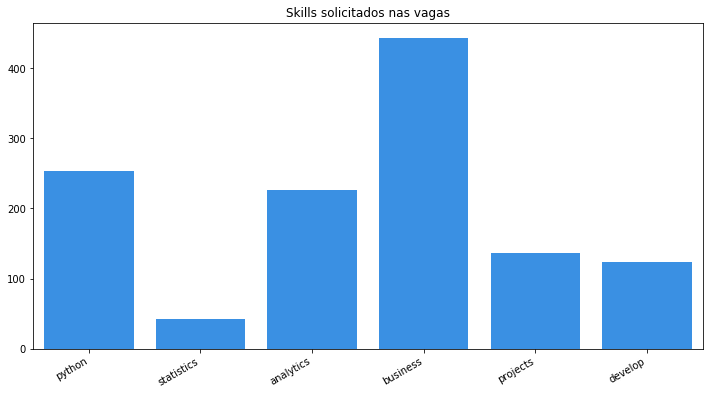

In [27]:
# definindo o tamanho
plt.figure(figsize=(12, 6))

# criando a visualização
sns.barplot(x = filtro_skills.index, y=filtro_skills.values, color='dodgerblue')

# inserindo o título
plt.title('Skills solicitados nas vagas')

# ajustando o eixo x
plt.xticks(rotation=30, horizontalalignment='right');

A palavra "Business" aparece com mais frequencia.